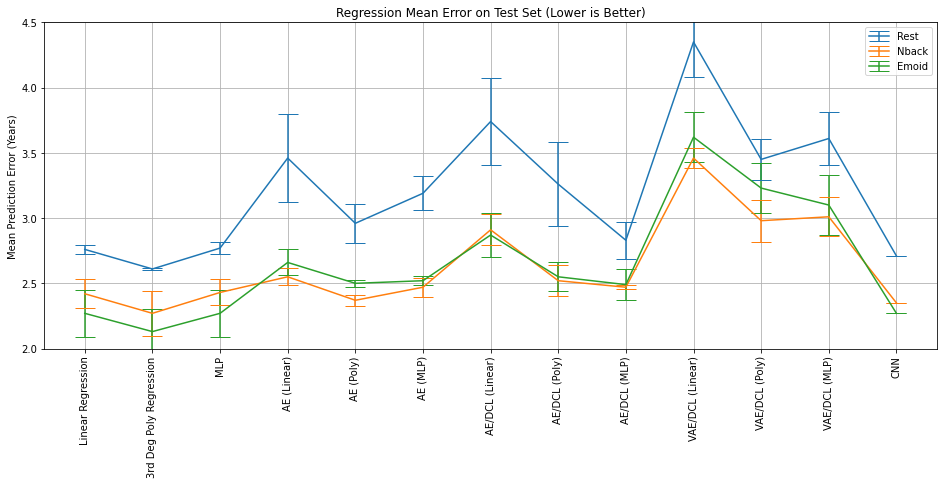

In [1]:
# Regression

import matplotlib.pyplot as plt
import numpy as np

x = ["Linear Regression", "3rd Deg Poly Regression", "MLP", "AE (Linear)", "AE (Poly)", "AE (MLP)", "AE/DCL (Linear)",
    "AE/DCL (Poly)", "AE/DCL (MLP)", "VAE/DCL (Linear)", "VAE/DCL (Poly)", "VAE/DCL (MLP)", "CNN"]
yRest = [2.76, 2.61, 2.77, 3.46, 2.96, 3.19, 3.74, 3.26, 2.83, 4.35, 3.45, 3.61, 2.71]
yNback = [2.42, 2.27, 2.43, 2.55, 2.37, 2.47, 2.91, 2.52, 2.47, 3.46, 2.98, 3.01, 2.35]
yEmoid = [2.27, 2.13, 2.27, 2.66, 2.5, 2.52, 2.87, 2.55, 2.49, 3.62, 3.23, 3.10, 2.27]
yErrRest = [.035, 0.01, 0.046, 0.34, 0.15, 0.13, 0.33, 0.32, 0.14, 0.27, 0.16, 0.20, 0]
yErrNback = [0.11, 0.17, 0.10, 0.064, 0.044, 0.074, 0.12, 0.12, 0.017, 0.075, 0.16, 0.15, 0]
yErrEmoid = [0.18, 0.17, 0.18, 0.10, 0.026, 0.035, 0.17, 0.11, 0.12, 0.19, 0.19, 0.23, 0]

plt.rcParams["figure.figsize"] = (16,6)
plt.errorbar(x, yRest, yerr=yErrRest, label="Rest", capsize=10)
plt.errorbar(x, yNback, yerr=yErrNback, label="Nback", capsize=10)
plt.errorbar(x, yEmoid, yerr=yErrEmoid, label="Emoid", capsize=10)
plt.legend()
plt.title('Regression Mean Error on Test Set (Lower is Better)')
plt.ylim([2,4.5])
plt.ylabel('Mean Prediction Error (Years)')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

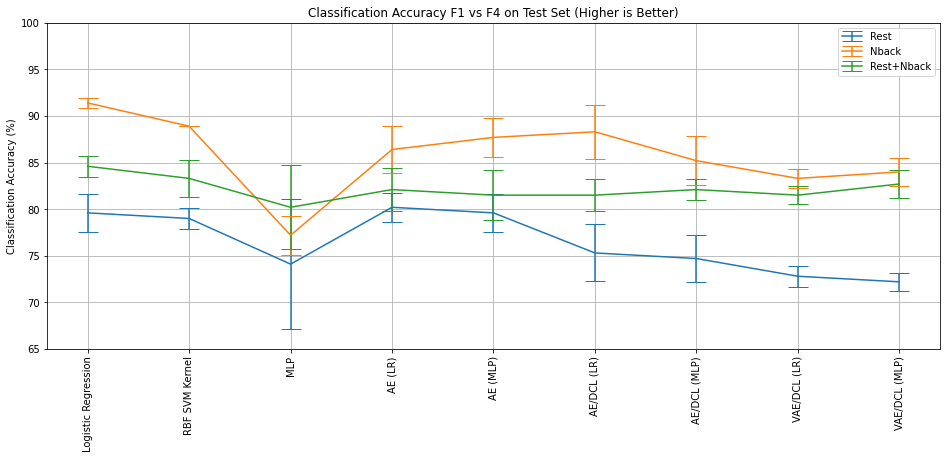

In [40]:
# Classification

x = ["Logistic Regression", "RBF SVM Kernel", "MLP", "AE (LR)", "AE (MLP)", "AE/DCL (LR)",
    "AE/DCL (MLP)", "VAE/DCL (LR)", "VAE/DCL (MLP)"]

yRest = [79.6, 79, 74.1, 80.2, 79.6, 75.3, 74.7, 72.8, 72.2]
yNback = [91.4, 88.9, 77.2, 86.4, 87.7, 88.3, 85.2, 83.3, 84.0]
yRestNback = [84.6, 83.3, 80.2, 82.1, 81.5, 81.5, 82.1, 81.5, 82.7]

yErrRest = [2, 1.15, 7, 1.53, 2, 3.06, 2.52, 1.15, 1]
yErrNback = [0.58, 0, 2.08, 2.52, 2.08, 2.89, 2.65, 1, 1.53]
yErrRestNback = [1.15, 2, 4.51, 2.31, 2.65, 1.73, 1.15, 1, 1.52]

plt.rcParams["figure.figsize"] = (16,6)
plt.errorbar(x, yRest, yerr=yErrRest, label="Rest", capsize=10)
plt.errorbar(x, yNback, yerr=yErrNback, label="Nback", capsize=10)
plt.errorbar(x, yRestNback, yerr=yErrRestNback, label="Rest+Nback", capsize=10)
plt.legend()
plt.title('Classification Accuracy F1 vs F4 on Test Set (Higher is Better)')
plt.ylim([65,100])
plt.ylabel('Classification Accuracy (%)')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

$L(\theta,\phi,X_{rest},X_{nback}) = \Sigma(X_{rest}-X'_{rest})^2 + \Sigma(X_{nback}-X'_{nback})^2 + \Sigma(cor(X_{rest})-cor(X_{nback}))^2 + E_{q_{\phi}(z|x_{rest})}[\frac{q_{\phi}(z|x_{rest})}{p_{\theta}(z|x_{rest})}] + E_{q_{\phi}(z|x_{nback})}[\frac{q_{\phi}(z|x_{nback})}{p_{\theta}(z|x_{nback})}]$

$z = Enc(x)$ Latent state

$X'_{rest} = Dec_1(Enc_1(X_{rest}))$

$X'_{nback} = Dec_2(Enc_2(X_{nback}))$

$p_{\theta}(z|x_{rest}) = N(0,1)$

$z = \mu + \sigma\epsilon$, $\epsilon = N(0,1)$

Prior on $\mu=0, \sigma=1$

In [3]:
import pickle

def loadTimeseries(_id, _dir):
    ts = None
    with open('{:s}/{:d}.bin'.format(_dir, _id), 'rb') as f:
        ts = pickle.load(f)
    return ts

ts = loadTimeseries(0, '../../nback_fmri_power264/timeseries')

print(ts.shape)

(264, 231)
